# COVID19 Data Analysis as of May 10, 2020

### Observations:
* Intially there were significant count that was not allocated to the county and was tagged as `Statewide Unallocated` and was eventually distributed to appropriate counties.
* Counties with higher population `(Bergen, Essex, Hudson, Middlesex, Passaic and Union County)` reported higher positive cases
* Death count is not proportionate to the posiive case count. `Example - Middlesex county has lower death ratio compared to Morris, Sommerset and Warran County'
* Some counties `(Bergen and Middlesex)` are showing significant stability ~ others `(Salem and Cape May)` which are still accumlating the cases
* In general it appears most of the NJ counties are close to or at the peak of COVID19 pandamic situation.

In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
%matplotlib inline

In [2]:
#Input Data file path
file_path=os.path.join("","resources/")
graph_path =os.path.join("assets","images/")

#Input file Names
confirmed_cases ="covid_confirmed_usafacts_nj.csv"
confirmed_deaths ="covid_deaths_usafacts_nj.csv"
county_population ="covid_county_population_usafacts_nj.csv"

## COVID19 Confirmed Cases Analysis

In [3]:
#Create data frames
confirmed_df = pd.read_csv(file_path+confirmed_cases)

In [4]:
#Display sample data
confirmed_df.head(2)

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020
0,0,Statewide Unallocated,NJ,34,0,0,0,0,0,0,...,583,676,641,647,550,550,552,553,557,591
1,34001,Atlantic County,NJ,34,0,0,0,0,0,0,...,1012,1050,1075,1135,1190,1246,1302,1423,1494,1510


In [5]:
#Delete Columns with zero values -COVID reporting did not start
confirmed_data = confirmed_df.loc[:, (confirmed_df != 0).any(axis=0)]

In [6]:
#Display sample data
confirmed_data.head(2)

,countyFIPS,County Name,State,stateFIPS,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,...,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020
0,0,Statewide Unallocated,NJ,34,0,0,0,0,0,8,...,583,676,641,647,550,550,552,553,557,591
1,34001,Atlantic County,NJ,34,0,0,0,0,0,0,...,1012,1050,1075,1135,1190,1246,1302,1423,1494,1510


In [7]:
#Delete irrelevant columns
confirmed_data = confirmed_data.drop(["countyFIPS","State","stateFIPS"], axis = 1) 

In [8]:
#Display sample data
confirmed_data.head(2)

,County Name,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,...,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020
0,Statewide Unallocated,0,0,0,0,0,8,8,0,3,...,583,676,641,647,550,550,552,553,557,591
1,Atlantic County,0,0,0,0,0,0,0,0,0,...,1012,1050,1075,1135,1190,1246,1302,1423,1494,1510


In [9]:
#Set Index key
confirmed_data=confirmed_data.set_index(keys=["County Name"])

In [10]:
#Transpose Data
confirmed_data =confirmed_data.T

In [11]:
#Preparing data for html table
table_data =confirmed_data
table_data=table_data.reset_index()
table_data.index.rename('', inplace=True)
table_data=table_data.rename(columns={"index": "Date"})
data = table_data

#### Export Case Data to html table

In [12]:
#Exporitng data to html table
html=data.to_html(justify="center")
#write html to file
text_file = open(file_path+"casedatatable.html", "w")
text_file.write(html)
text_file.close()

### COVID19 Cumulative Confirmed case chart

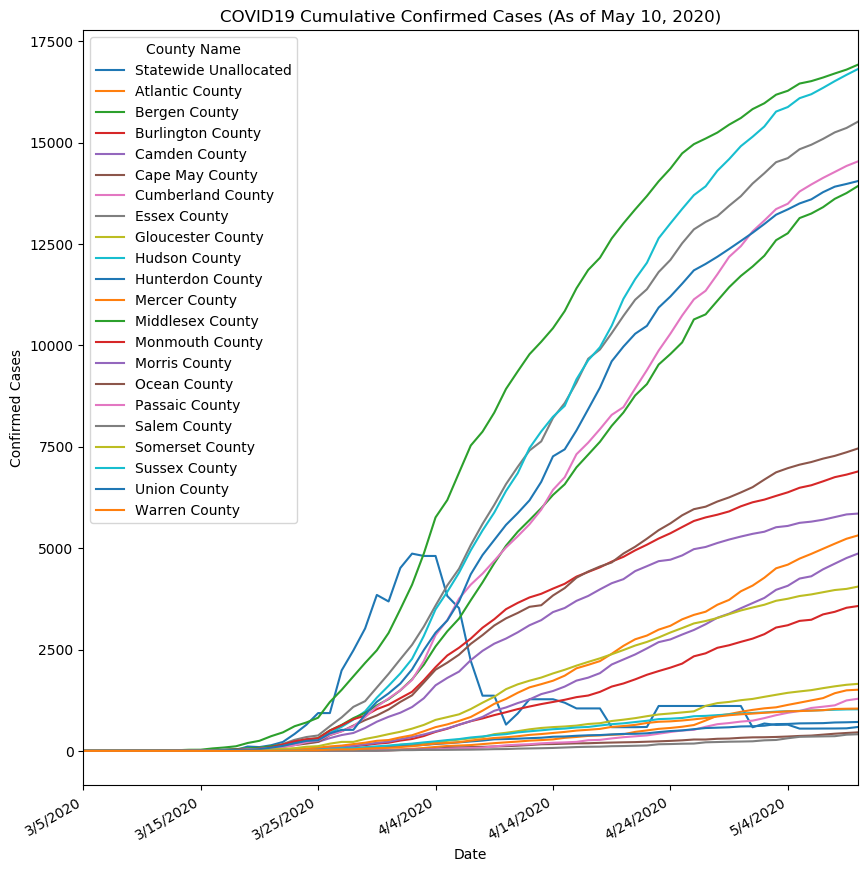

In [13]:
#Set fig size
fig,ax = plt.subplots(figsize=(10,10), dpi=100)
#Set chart 
confirmed_data.plot(kind="line",ax=ax)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("COVID19 Cumulative Confirmed Cases (As of May 10, 2020)")
#Set x axis lable alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#Save plot file
plt.savefig(graph_path +"casesCounty.png")

In [14]:
#As data is in cumuative sum format, let's grab the last row.
#Order data by any county name as cumulative number will always increase
confirmed_data=confirmed_data.sort_values(by=["Atlantic County"], axis=0, ascending=False)

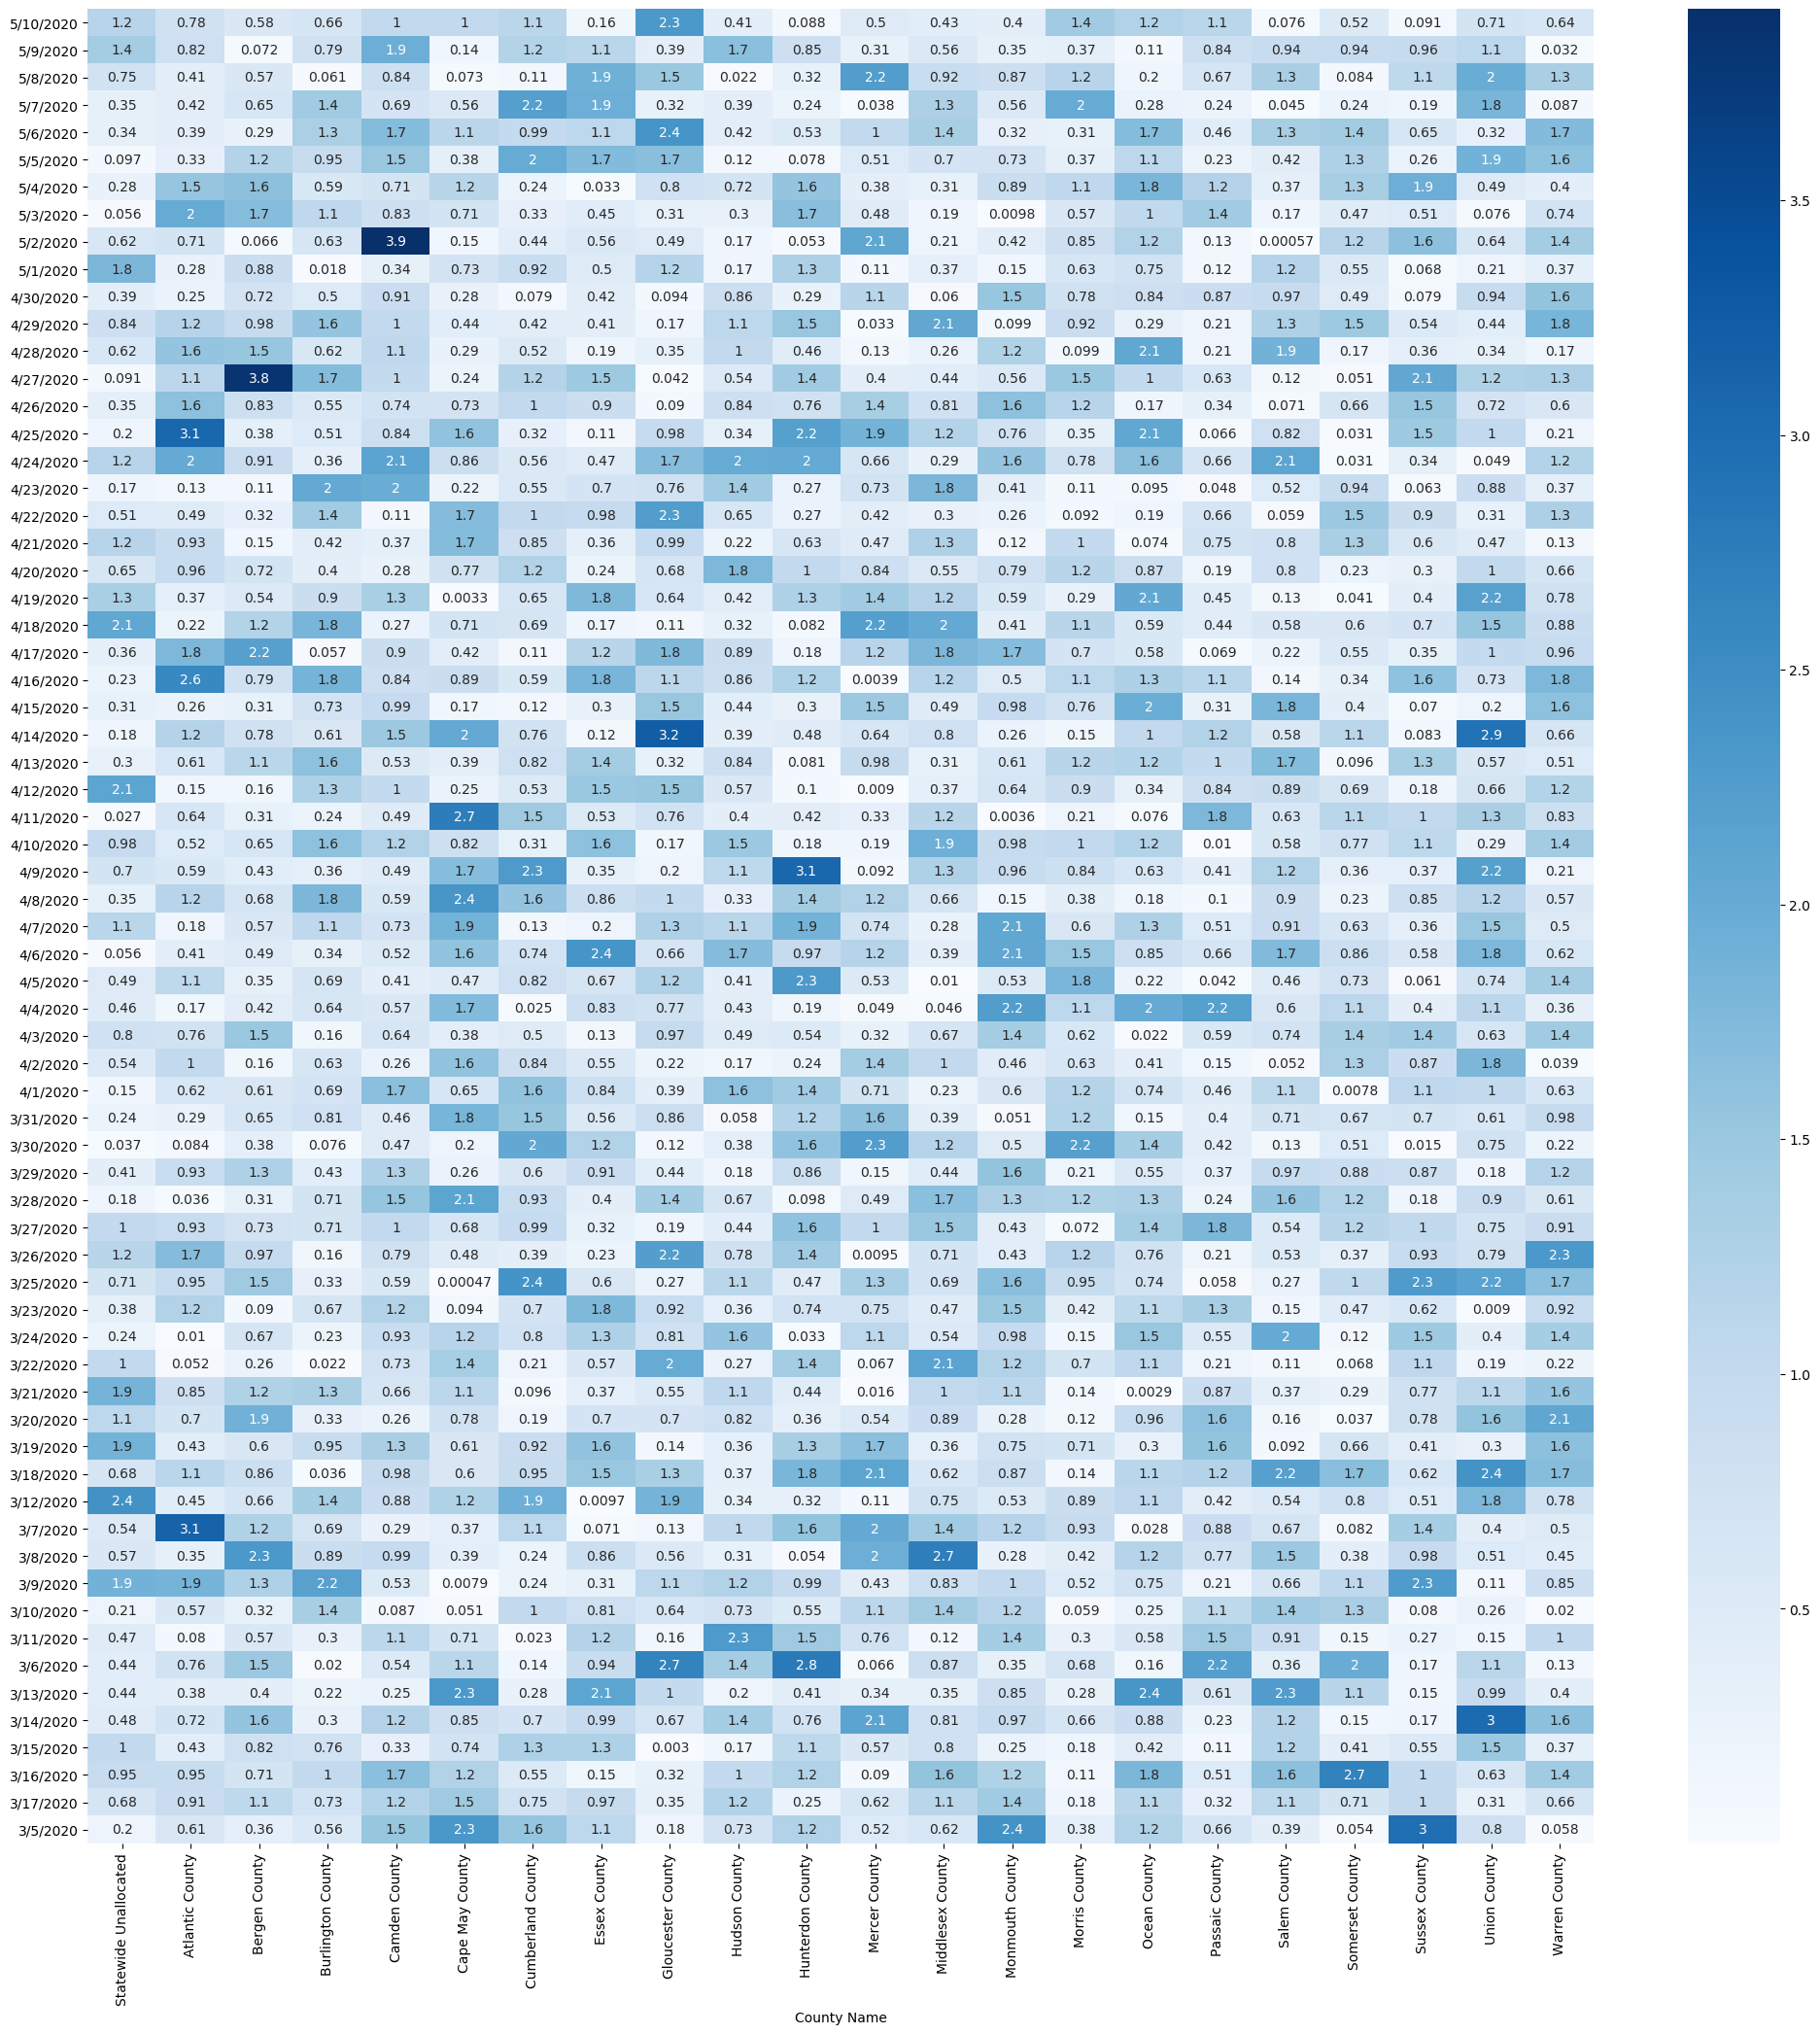

In [15]:
#Plot heatmap
#Set fig size
fig,ax = plt.subplots(figsize=(25,25), dpi=100)
Index= confirmed_data.index
Cols = confirmed_data.columns
df = pd.DataFrame(abs(np.random.randn(67, 22)), index=Index, columns=Cols)

sns.heatmap(df, annot=True, cmap="Blues")
#Save plot file
plt.savefig(graph_path +"casesCountyHeatmap.png")

In [16]:
#Display sample data
confirmed_data.head(2)

County Name,Statewide Unallocated,Atlantic County,Bergen County,Burlington County,Camden County,Cape May County,Cumberland County,Essex County,Gloucester County,Hudson County,...,Middlesex County,Monmouth County,Morris County,Ocean County,Passaic County,Salem County,Somerset County,Sussex County,Union County,Warren County
5/10/2020,591,1510,16929,3574,4870,458,1287,15524,1654,16822,...,13937,6894,5854,7462,14543,411,4054,1026,14057,1044
5/9/2020,557,1494,16804,3531,4758,442,1245,15365,1631,16675,...,13759,6815,5833,7366,14428,400,3996,1023,13984,1040


In [17]:
#Get first row
final_case_count = confirmed_data[:1]

In [18]:
#Display sample data
final_case_count

County Name,Statewide Unallocated,Atlantic County,Bergen County,Burlington County,Camden County,Cape May County,Cumberland County,Essex County,Gloucester County,Hudson County,...,Middlesex County,Monmouth County,Morris County,Ocean County,Passaic County,Salem County,Somerset County,Sussex County,Union County,Warren County
5/10/2020,591,1510,16929,3574,4870,458,1287,15524,1654,16822,...,13937,6894,5854,7462,14543,411,4054,1026,14057,1044


In [19]:
#Reset index
final_case_count=final_case_count.reset_index()

In [20]:
#Display sample data
final_case_count

County Name,index,Statewide Unallocated,Atlantic County,Bergen County,Burlington County,Camden County,Cape May County,Cumberland County,Essex County,Gloucester County,...,Middlesex County,Monmouth County,Morris County,Ocean County,Passaic County,Salem County,Somerset County,Sussex County,Union County,Warren County
0,5/10/2020,591,1510,16929,3574,4870,458,1287,15524,1654,...,13937,6894,5854,7462,14543,411,4054,1026,14057,1044


In [21]:
#Switch columns and rows
final_case_count=final_case_count.T

In [22]:
#Display sample data
final_case_count.head(2)

,0
County Name,
index,5/10/2020
Statewide Unallocated,591


In [23]:
#Reset Index
final_case_count=final_case_count.reset_index()

In [24]:
#Display sample data
final_case_count.head(2)

,County Name,0
0,index,5/10/2020
1,Statewide Unallocated,591


In [25]:
#Drop first row - date row
final_case_count=final_case_count.drop(final_case_count.index[0])

In [26]:
#Display sample data
final_case_count.head(2)

,County Name,0
1,Statewide Unallocated,591
2,Atlantic County,1510


In [27]:
#Rename columns
final_case_count=final_case_count.rename(columns={0: "CaseCount"})

In [28]:
#Display sample data
final_case_count.head(2)

,County Name,CaseCount
1,Statewide Unallocated,591
2,Atlantic County,1510


### COVID19 Confirmed cases by County (As of May 10, 2020)

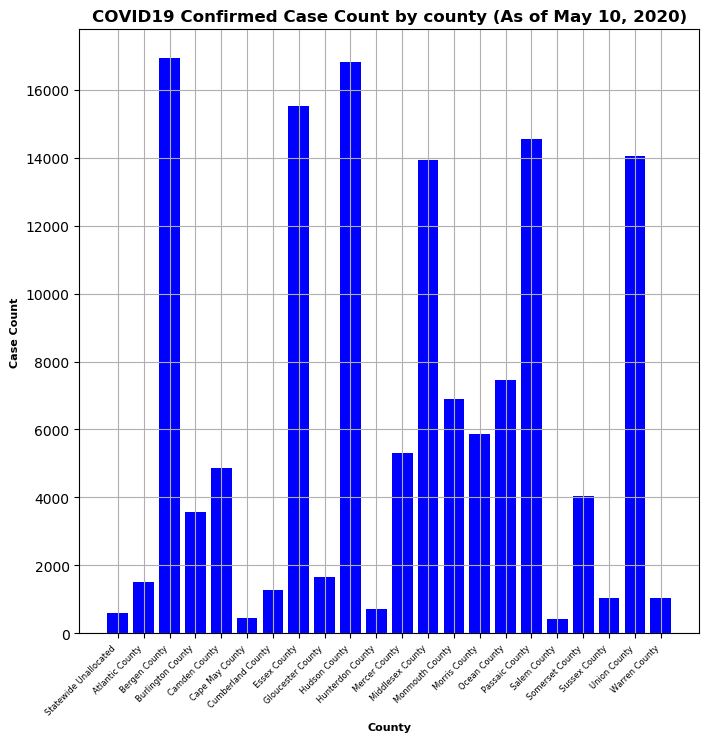

In [29]:
#Set fig size
fig,ax = plt.subplots(figsize=(8,8), dpi=100)

#Get x and y axis
x_axis= final_case_count["County Name"]
y_axis = final_case_count["CaseCount"]
 
#Set the plot with x and y axis
plt.bar(x_axis,y_axis,color="blue")

#Set graph legend
plt.xlabel("County", weight='bold', size=8)
plt.ylabel("Case Count", weight='bold', size=8)
plt.title("COVID19 Confirmed Case Count by county (As of May 10, 2020)", weight='bold', size=12)
plt.grid(axis='both')
plt.draw()

#Set x axis lable alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=6)

#Save plot file
plt.savefig(graph_path +"bcasesCounty.png")

## COVID19 Death Count Analysis (As of May 10, 2020)

In [30]:
#Create data frames
death_df = pd.read_csv(file_path+confirmed_deaths)

In [31]:
#death_df=death_df.reset_index()

In [32]:
#Display sample data
death_df.head(2)

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020
0,0,Statewide Unallocated,NJ,34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,34001,Atlantic County,NJ,34,0,0,0,0,0,0,...,45,48,49,51,51,54,62,68,72,72


In [33]:
#Delete Columns with zero values -COVID reporting did not start
death_data = death_df.loc[:, (death_df != 0).any(axis=0)]

In [34]:
#Display sample data
death_data.head(1)

,countyFIPS,County Name,State,stateFIPS,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,...,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020
0,0,Statewide Unallocated,NJ,34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
#Delete irrelevant columns
confirmed_death = death_data.drop(["countyFIPS","State","stateFIPS"], axis = 1) 

In [36]:
#Display sample data
confirmed_death.head(1)

,County Name,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,...,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020
0,Statewide Unallocated,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
#Set index key
confirmed_death=confirmed_death.set_index(keys=["County Name"])

In [38]:
#Transpose Data
confirmed_death =confirmed_death.T

#### Export Death Case Data to html table

In [39]:
#Prepare data to export to html table
table_data =confirmed_death.T
table_data=table_data.reset_index()
table_data.index.rename('', inplace=True)
table_data=table_data.rename(columns={"index": "Date"})
data = table_data

In [40]:
#Exporitng data to html table
html=data.to_html(justify="center")
#write html to file
text_file = open(file_path+"deathdatatable.html", "w")
text_file.write(html)
text_file.close()

### COVID19 Cumulative Confirmed Deaths chart

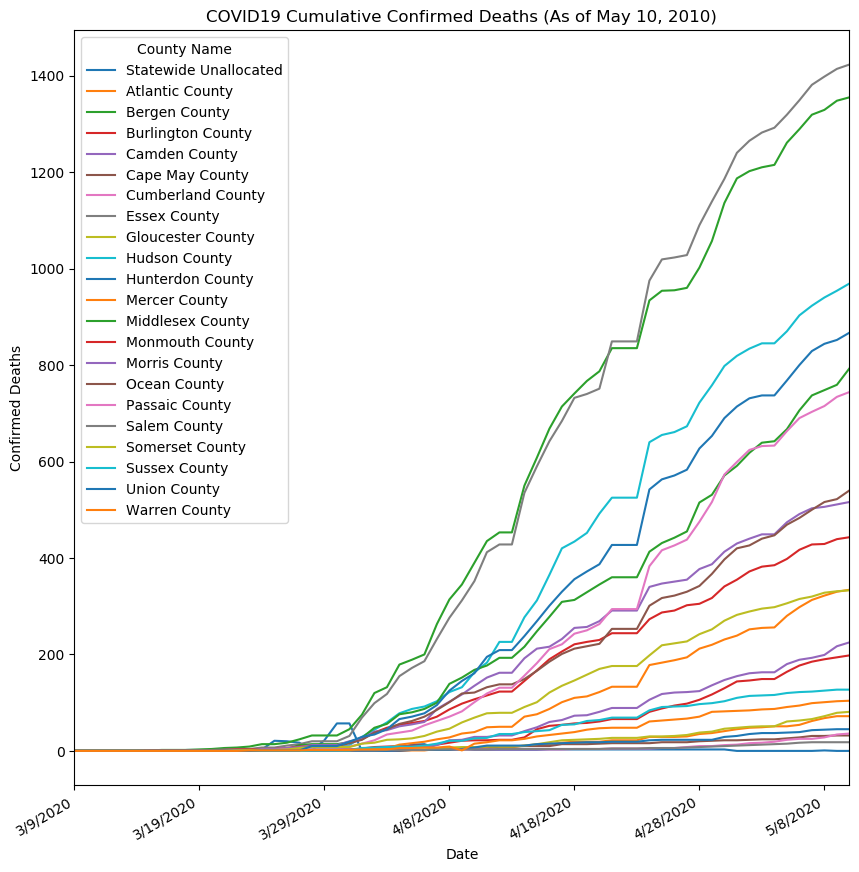

In [41]:
#Set fig size
fig,ax = plt.subplots(figsize=(10,10), dpi=100)

#Plot chart
confirmed_death.plot(kind="line",ax=ax)
plt.xlabel("Date")
plt.ylabel("Confirmed Deaths")
plt.title("COVID19 Cumulative Confirmed Deaths (As of May 10, 2010)")
#Set x axis lable alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#Save plot file
plt.savefig(graph_path +"deathsCounty.png")

In [42]:
#Order by any county as cumulative numbers will be in order
confirmed_death=confirmed_death.sort_values(by=["Atlantic County"], axis=0, ascending=False)

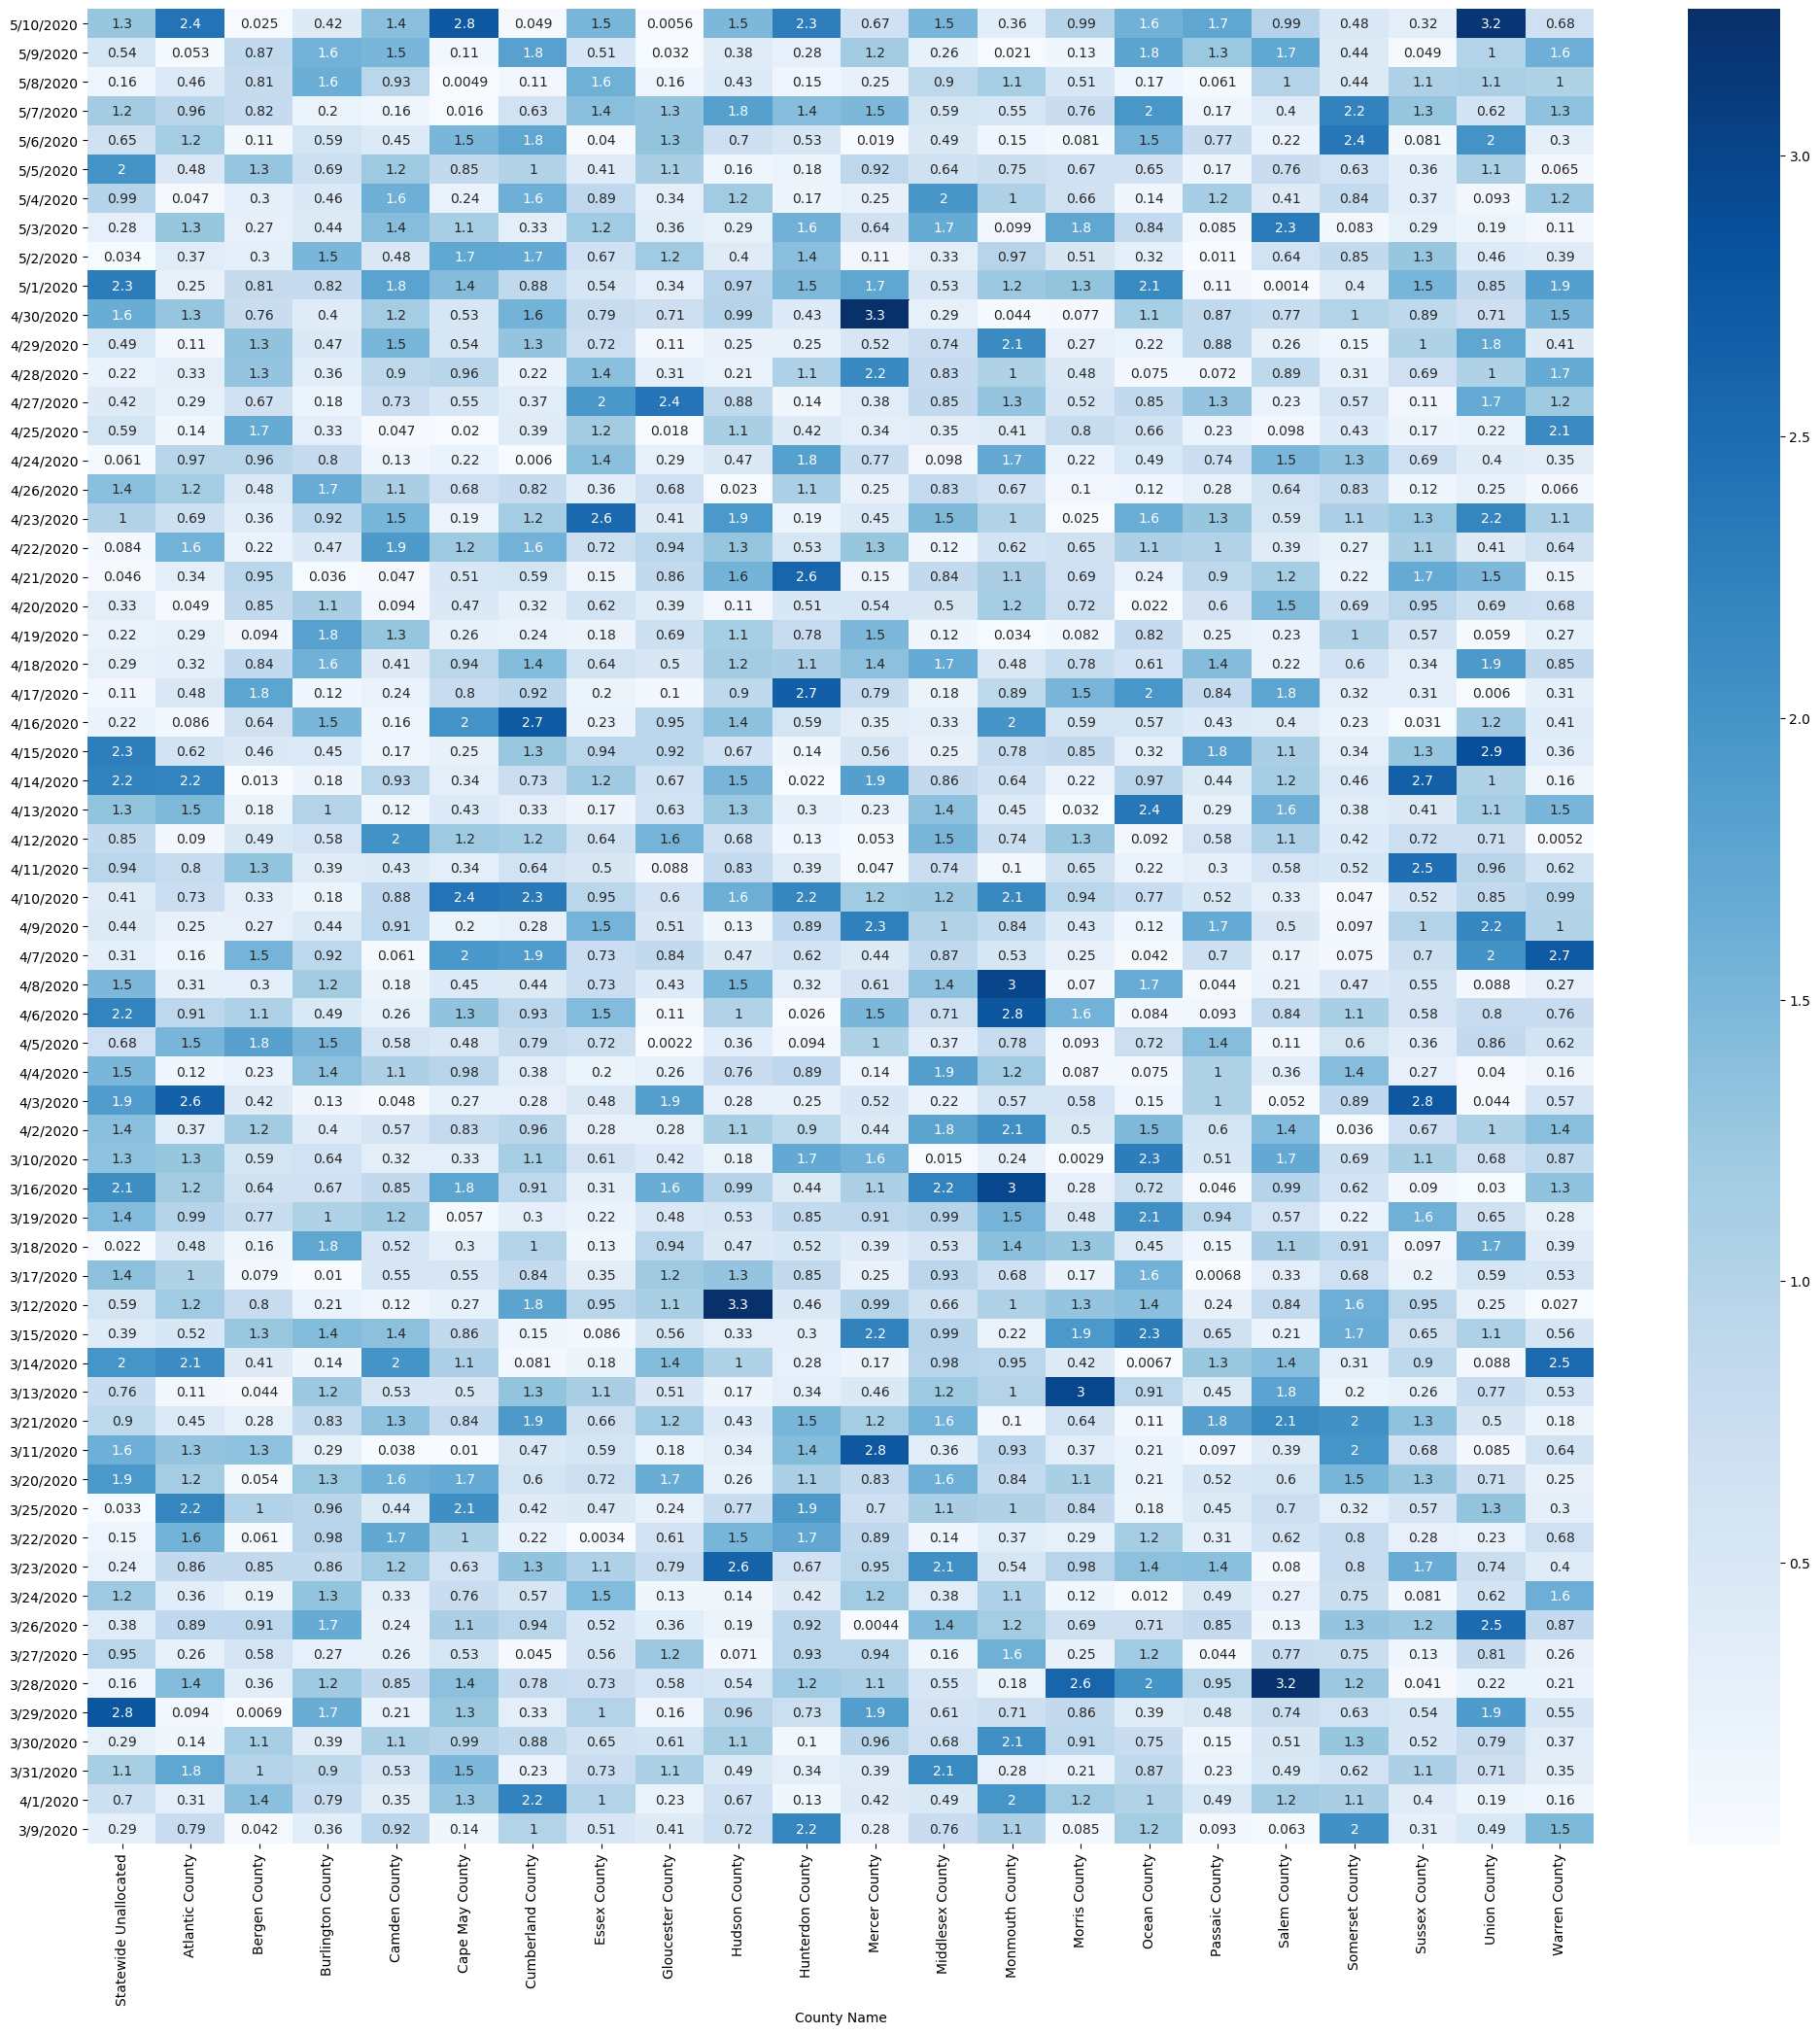

In [43]:
#Plot heatmap
#Set fig size
fig,ax = plt.subplots(figsize=(25,25), dpi=100)
Index= confirmed_death.index
Cols = confirmed_death.columns
df = pd.DataFrame(abs(np.random.randn(63, 22)), index=Index, columns=Cols)

sns.heatmap(df, annot=True, cmap="Blues")

#Save plot file
plt.savefig(graph_path +"deathsCountyHeatmap.png")

In [44]:
#Display sample data
confirmed_death.head(2)

County Name,Statewide Unallocated,Atlantic County,Bergen County,Burlington County,Camden County,Cape May County,Cumberland County,Essex County,Gloucester County,Hudson County,...,Middlesex County,Monmouth County,Morris County,Ocean County,Passaic County,Salem County,Somerset County,Sussex County,Union County,Warren County
5/10/2020,0,72,1355,198,225,32,36,1423,81,969,...,793,443,516,540,744,18,333,127,867,104
5/9/2020,0,72,1348,194,217,32,34,1414,79,954,...,759,439,511,522,734,18,331,127,852,103


In [45]:
#Get Cumulative sum of columns
final_death_count = confirmed_death[:1]

In [46]:
#Display sample data
final_death_count.head()

County Name,Statewide Unallocated,Atlantic County,Bergen County,Burlington County,Camden County,Cape May County,Cumberland County,Essex County,Gloucester County,Hudson County,...,Middlesex County,Monmouth County,Morris County,Ocean County,Passaic County,Salem County,Somerset County,Sussex County,Union County,Warren County
5/10/2020,0,72,1355,198,225,32,36,1423,81,969,...,793,443,516,540,744,18,333,127,867,104


In [47]:
#Reset Index
final_death_count=final_death_count.reset_index()

In [48]:
#Display sample data
final_death_count.head(2)

County Name,index,Statewide Unallocated,Atlantic County,Bergen County,Burlington County,Camden County,Cape May County,Cumberland County,Essex County,Gloucester County,...,Middlesex County,Monmouth County,Morris County,Ocean County,Passaic County,Salem County,Somerset County,Sussex County,Union County,Warren County
0,5/10/2020,0,72,1355,198,225,32,36,1423,81,...,793,443,516,540,744,18,333,127,867,104


In [49]:
#Transpose
final_death_count=final_death_count.T

In [50]:
#Display sample data
final_death_count.head()

,0
County Name,
index,5/10/2020
Statewide Unallocated,0
Atlantic County,72
Bergen County,1355
Burlington County,198


In [51]:
#Reset Index
final_death_count=final_death_count.reset_index()

In [52]:
#Display sample data
final_death_count.head(2)

,County Name,0
0,index,5/10/2020
1,Statewide Unallocated,0


In [53]:
#Drop first row
final_death_count=final_death_count.drop(final_death_count.index[0])

In [54]:
#Rename columns
final_death_count=final_death_count.rename(columns={0: "DeathCount"})

In [55]:
#Display sample data
final_death_count.head(2)

,County Name,DeathCount
1,Statewide Unallocated,0
2,Atlantic County,72


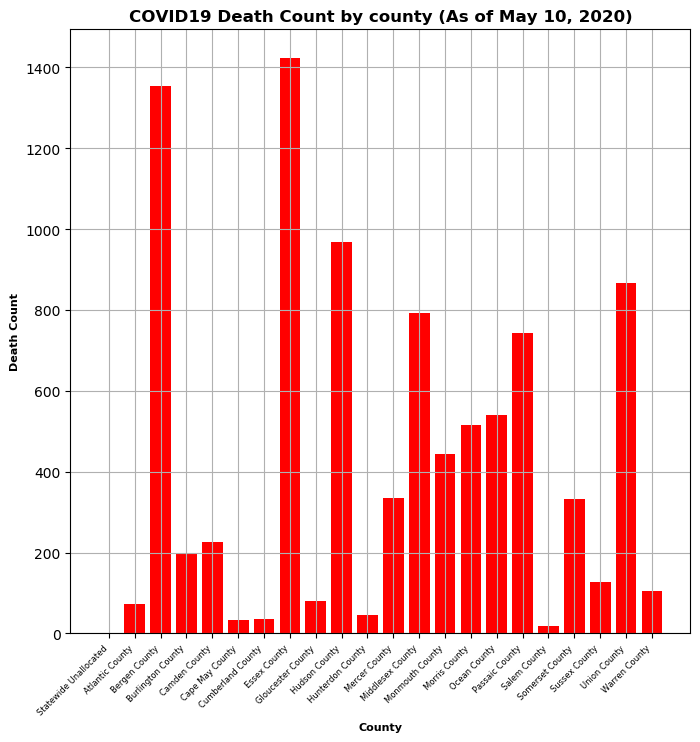

In [56]:
#Set fig size
fig,ax = plt.subplots(figsize=(8,8), dpi=100)

#Get x and y axis
x_axis= final_death_count["County Name"]
y_axis = final_death_count["DeathCount"]
 
#Set the plot with x and y axis
plt.bar(x_axis,y_axis,color="red")

#Set graph legend
plt.xlabel("County", weight='bold', size=8)
plt.ylabel("Death Count", weight='bold', size=8)
plt.title("COVID19 Death Count by county (As of May 10, 2020)", weight='bold', size=12)
plt.grid(True)
plt.draw()

#Set x axis lable alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=6)
#Save plot file
plt.savefig(graph_path +"bdeathsCounty.png")

## Combined Cumulative COVID10 Positive and Death Cases Analysis

In [57]:
#Display sample data
final_case_count.head(1)

,County Name,CaseCount
1,Statewide Unallocated,591


In [58]:
#Display sample data
final_death_count.head(1)

,County Name,DeathCount
1,Statewide Unallocated,0


In [59]:
#Merge two df's
cases_deaths_df = pd.merge(final_case_count,final_death_count, on="County Name")

In [60]:
cases_deaths_df.head(2)

,County Name,CaseCount,DeathCount
0,Statewide Unallocated,591,0
1,Atlantic County,1510,72


In [61]:
#Let's gte population data
df_population = pd.read_csv(file_path+county_population)
df_population.head(2)

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,NJ,0
1,34001,Atlantic County,NJ,263670


In [62]:
#Select required colums
df_population=df_population[["County Name","population"]]

In [63]:
#Display sample data
df_population.head(1)

,County Name,population
0,Statewide Unallocated,0


In [64]:
#Calculate per 10K population ration
population_index=100000/df_population["population"]
counties =df_population["County Name"]

In [65]:
#Create df for population ratio/index oper 10K
population_index=pd.DataFrame({"County Name":counties,"population":population_index})

In [66]:
#Display Data
population_index.head(2)

,County Name,population
0,Statewide Unallocated,inf
1,Atlantic County,0.379262


In [67]:
#Display data
cases_deaths_df.head(2)

,County Name,CaseCount,DeathCount
0,Statewide Unallocated,591,0
1,Atlantic County,1510,72


In [68]:
#Merge two df's
cases_deaths_population_df = pd.merge(cases_deaths_df,population_index, on="County Name")

In [69]:
#Display sample data
cases_deaths_population_df.head(2)

,County Name,CaseCount,DeathCount,population
0,Statewide Unallocated,591,0,inf
1,Atlantic County,1510,72,0.379262


In [70]:
#Multipley each count by population ration
cases_deaths_population_df["CaseCount"]=cases_deaths_population_df["CaseCount"]*cases_deaths_population_df["population"]
cases_deaths_population_df["DeathCount"]=cases_deaths_population_df["DeathCount"]*cases_deaths_population_df["population"]

In [71]:
#Display sample data
cases_deaths_population_df.head(2)

,County Name,CaseCount,DeathCount,population
0,Statewide Unallocated,inf,NaN,inf
1,Atlantic County,572.686,27.3069,0.379262


In [72]:
#Drop first row
cases_deaths_population_df=cases_deaths_population_df.drop(cases_deaths_population_df.index[0])

In [73]:
cases_deaths_population_df.head(2)

,County Name,CaseCount,DeathCount,population
1,Atlantic County,572.686,27.3069,0.379262
2,Bergen County,1816.02,145.355,0.107273


In [74]:
#Let's take only CaseCount and DeathCount
cases_deaths_population_df=cases_deaths_population_df[["County Name","CaseCount","DeathCount"]]

In [75]:
#Display sample data
cases_deaths_population_df.head(1)

,County Name,CaseCount,DeathCount
1,Atlantic County,572.686,27.3069


In [76]:
#Set index as County Name
cases_deaths_population_df=cases_deaths_population_df.set_index("County Name")

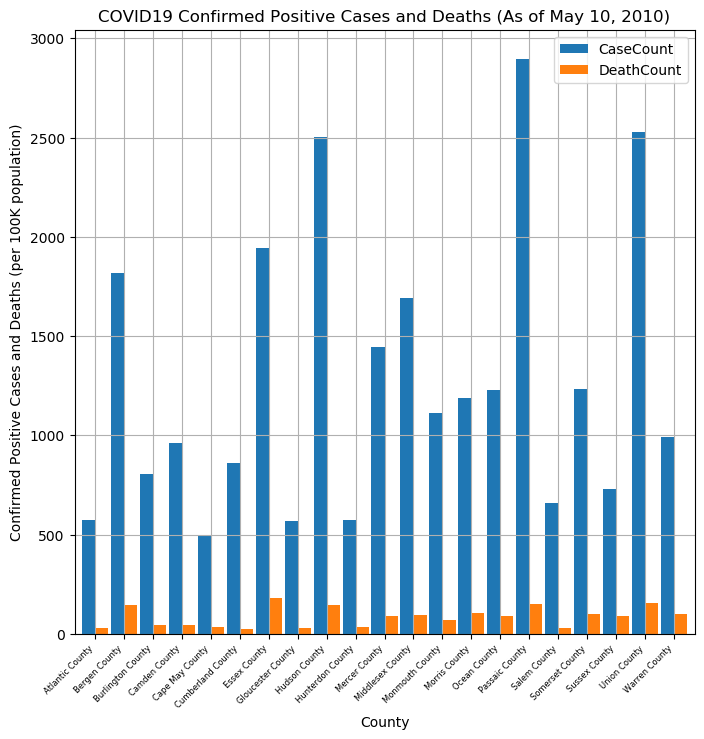

In [77]:
#Set fig size
fig,ax = plt.subplots(figsize=(8,8), dpi=100)

#Plot chart
cases_deaths_population_df.plot(kind="bar",ax=ax,width=.90)
plt.xlabel("County")
plt.ylabel("Confirmed Positive Cases and Deaths (per 100K population)")
plt.title("COVID19 Confirmed Positive Cases and Deaths (As of May 10, 2010)")
plt.grid(True)
#Set x axis lable alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=6)
#Save plot file
plt.savefig(graph_path +"bcasesdeathsCounty.png")

## COVID19 Case Analysis for top two and bottom two counties by population 

In [78]:
#Lets merge all 3 data Frames
df_confirm_cases = pd.read_csv(file_path+confirmed_cases)
df_confirm_deaths = pd.read_csv(file_path+confirmed_deaths)
df_population = pd.read_csv(file_path+county_population)

In [79]:
#Display sample data
df_confirm_cases.head(2)

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020
0,0,Statewide Unallocated,NJ,34,0,0,0,0,0,0,...,583,676,641,647,550,550,552,553,557,591
1,34001,Atlantic County,NJ,34,0,0,0,0,0,0,...,1012,1050,1075,1135,1190,1246,1302,1423,1494,1510


## Bergen County

In [80]:
#Get Data sets
bergen_confirmed =df_confirm_cases[df_confirm_cases["County Name"].isin (["Bergen County"])]
bergen_deaths = df_confirm_deaths[df_confirm_deaths["County Name"].isin (["Bergen County"])]
bergen_population = df_population[df_population["County Name"].isin(["Bergen County"])]

In [81]:
#Reset index
bergen_confirmed =bergen_confirmed.reset_index()
bergen_deaths =bergen_deaths.reset_index()
bergen_population =bergen_population.reset_index()

In [82]:
#Display sample data
bergen_population.head(2)

,index,countyFIPS,County Name,State,population
0,2,34003,Bergen County,NJ,932202


In [83]:
#Delete irrlevant columns
bergen_confirmed = bergen_confirmed.drop(["index","countyFIPS","State","stateFIPS"], axis = 1) 
bergen_deaths = bergen_deaths.drop(["index","countyFIPS","State","stateFIPS"], axis = 1) 
bergen_population = bergen_population.drop(["index","countyFIPS","State"], axis = 1) 

In [84]:
#Set indexes
bergen_confirmed =bergen_confirmed.set_index("County Name")
bergen_deaths =bergen_deaths.set_index("County Name")
bergen_population =bergen_population.set_index("County Name")

In [85]:
#Transpose Data
bergen_confirmed =bergen_confirmed.T
bergen_deaths =bergen_deaths.T
bergen_population =bergen_population.T

In [86]:
#Display sample data
bergen_confirmed.head(2)

County Name,Bergen County
1/22/2020,0
1/23/2020,0


In [87]:
#Rename coulum
bergen_confirmed=bergen_confirmed.rename(columns={"Bergen County":"BergenPostive"})
bergen_confirmed=bergen_confirmed.reset_index()

bergen_confirmed.tail(2)

County Name,index,BergenPostive
108,5/9/2020,16804
109,5/10/2020,16929


In [88]:
#Rename coulum
bergen_deaths=bergen_deaths.rename(columns={"Bergen County":"BergenDeaths"})
bergen_deaths=bergen_deaths.reset_index()

bergen_deaths.tail(2)

County Name,index,BergenDeaths
108,5/9/2020,1348
109,5/10/2020,1355


In [89]:
#Mere Confirmed cases and deaths
bergen_df = pd.merge(bergen_deaths,bergen_confirmed, on="index")

In [90]:
#Delete irrelevant column
#bergen_df=bergen_df.drop("level_0", axis=1)

In [91]:
#Reset Index
bergen_df=bergen_df.set_index("index")

In [92]:
#Display sample data
bergen_df.head(2)

County Name,BergenDeaths,BergenPostive
index,,
1/22/2020,0,0
1/23/2020,0,0


In [93]:
#Delete Columns with zero values -COVID reporting did not start
bergen_df = bergen_df.loc[(bergen_df != 0).any(axis=1)]

In [94]:
#Display sample data
bergen_df.head(2)

County Name,BergenDeaths,BergenPostive
index,,
3/5/2020,0,2
3/6/2020,0,2


In [95]:
#Reset Index
bergen_df=bergen_df.reset_index()

### Bergen County Plot - regular and logarithmic scale

In [96]:
#Create a Data Frames
begen_data=pd.DataFrame({"Date":(bergen_df["index"]),
                        "COVID19 Positive":(bergen_df["BergenPostive"]),
                        "COVID19 Deaths":(bergen_df["BergenDeaths"])})

#log scale
begen_data_log=pd.DataFrame({"Date":(bergen_df["index"]),
                        "COVID19 Positive":np.log(bergen_df["BergenPostive"]),
                        "COVID19 Deaths":np.log(bergen_df["BergenDeaths"])})

C:\Users\anuaj\Anaconda3\envs\PythonData2020_1\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [97]:
#Set date as index for charting
begen_data=begen_data.set_index("Date")
begen_data_log=begen_data_log.set_index("Date")

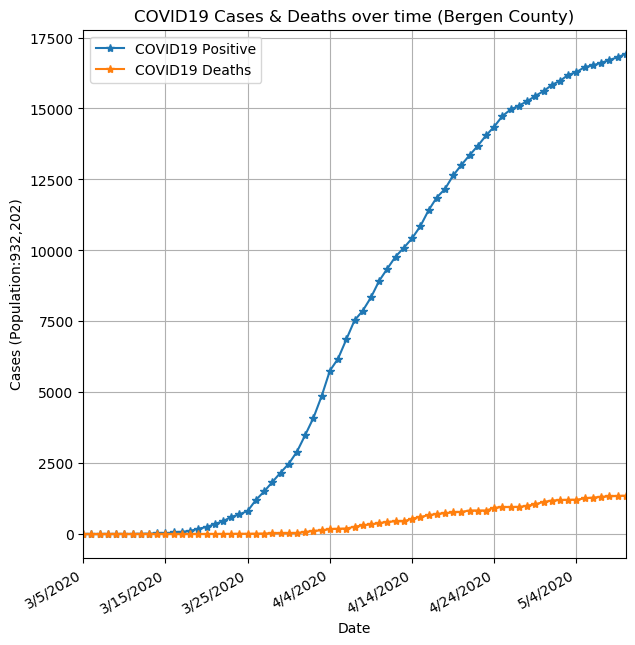

In [98]:
#Set fig size
fig,ax = plt.subplots(figsize=(7,7), dpi=100)

begen_data.plot(kind="line",ax=ax,marker = "*")
plt.xlabel("Date")
plt.ylabel("Cases (Population:932,202)")
plt.title("COVID19 Cases & Deaths over time (Bergen County)")
plt.grid(which='major')
#Set x axis lable alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#Save plot file
plt.savefig(graph_path +"bergenCounty.png")

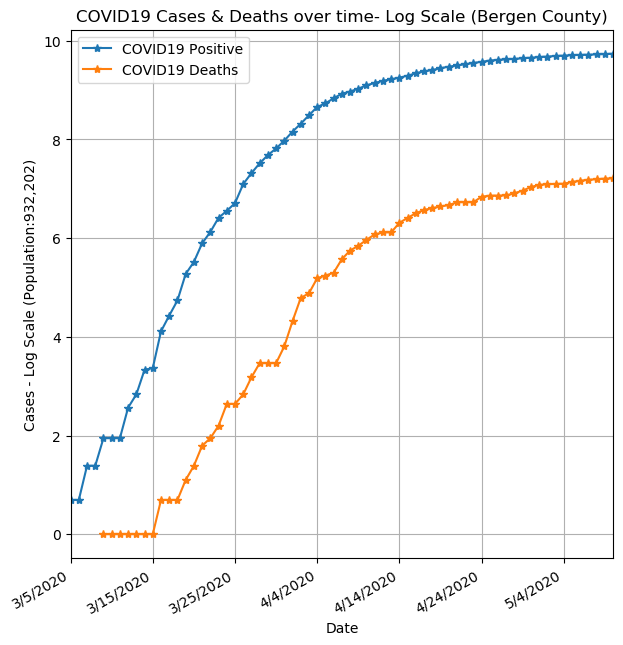

In [99]:
#Set fig size
fig,ax = plt.subplots(figsize=(7,7), dpi=100)

begen_data_log.plot(kind="line",ax=ax,marker = "*")
plt.xlabel("Date")
plt.ylabel("Cases - Log Scale (Population:932,202)")
plt.title("COVID19 Cases & Deaths over time- Log Scale (Bergen County)")
plt.grid(which='major')
#Set x axis lable alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#Save plot file
plt.savefig(graph_path +"bergenCountylog.png")

## Middlesex County

In [100]:
#Get Data sets
middlesex_confirmed =df_confirm_cases[df_confirm_cases["County Name"].isin (["Middlesex County"])]
middlesex_deaths = df_confirm_deaths[df_confirm_deaths["County Name"].isin (["Middlesex County"])]
middlesex_population = df_population[df_population["County Name"].isin(["Middlesex County"])]

In [101]:
#Reset index
middlesex_confirmed =middlesex_confirmed.reset_index()
middlesex_deaths =middlesex_deaths.reset_index()

In [102]:
#Delete irrlevant columns
middlesex_confirmed = middlesex_confirmed.drop(["index","countyFIPS","State","stateFIPS"], axis = 1) 
middlesex_deaths =middlesex_deaths.drop(["index","countyFIPS","State","stateFIPS"], axis = 1) 

In [103]:
#Display sample data
middlesex_confirmed.head(2)

,County Name,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020
0,Middlesex County,0,0,0,0,0,0,0,0,0,...,11947,12213,12597,12768,13142,13254,13411,13617,13759,13937


In [104]:
#Set indexes
middlesex_confirmed =middlesex_confirmed.set_index("County Name")
middlesex_deaths =middlesex_deaths.set_index("County Name")

In [105]:
#Transpose Data
middlesex_confirmed =middlesex_confirmed.T
middlesex_deaths =middlesex_deaths.T

In [106]:
#Rename column
middlesex_confirmed=middlesex_confirmed.rename(columns={"Middlesex County":"middlesexPositive"})
middlesex_deaths=middlesex_deaths.rename(columns={"Middlesex County":"middlesexDeaths"})
middlesex_confirmed=middlesex_confirmed.reset_index()
middlesex_deaths=middlesex_deaths.reset_index()

In [107]:
#Display sample data
middlesex_confirmed.head(2)

County Name,index,middlesexPositive
0,1/22/2020,0
1,1/23/2020,0


In [108]:
#Mere Confirmed cases and deaths
middlesex_df = pd.merge(middlesex_deaths,middlesex_confirmed, on="index")

In [109]:
#Display sample data
middlesex_df.head(2)

County Name,index,middlesexDeaths,middlesexPositive
0,1/22/2020,0,0
1,1/23/2020,0,0


In [110]:
#Set index
middlesex_df=middlesex_df.set_index("index")

In [111]:
#Delete Columns with zero values -COVID reporting did not start
middlesex_df = middlesex_df.loc[(middlesex_df != 0).any(axis=1)]

In [112]:
#Display sample data
middlesex_df.head(2)

County Name,middlesexDeaths,middlesexPositive
index,,
3/12/2020,0,2
3/13/2020,0,3


In [113]:
#Reset Index
middlesex_df=middlesex_df.reset_index()

In [114]:
#Display sample data
middlesex_df.head(2)

County Name,index,middlesexDeaths,middlesexPositive
0,3/12/2020,0,2
1,3/13/2020,0,3


### Middlesex County Plot - regular and logarithmic scale

In [115]:
#Create a Data Frames
middlesex_data=pd.DataFrame({"Date":(middlesex_df["index"]),
                        "COVID19 Positive":(middlesex_df["middlesexPositive"]),
                        "COVID19 Deaths":(middlesex_df["middlesexDeaths"])})

#Log scale
middlesex_data_log=pd.DataFrame({"Date":(middlesex_df["index"]),
                        "COVID19 Positive":np.log(middlesex_df["middlesexPositive"]),
                        "COVID19 Deaths":np.log(middlesex_df["middlesexDeaths"])})

C:\Users\anuaj\Anaconda3\envs\PythonData2020_1\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [116]:
#Set date as index for plot
middlesex_data=middlesex_data.set_index("Date")
middlesex_data_log=middlesex_data_log.set_index("Date")

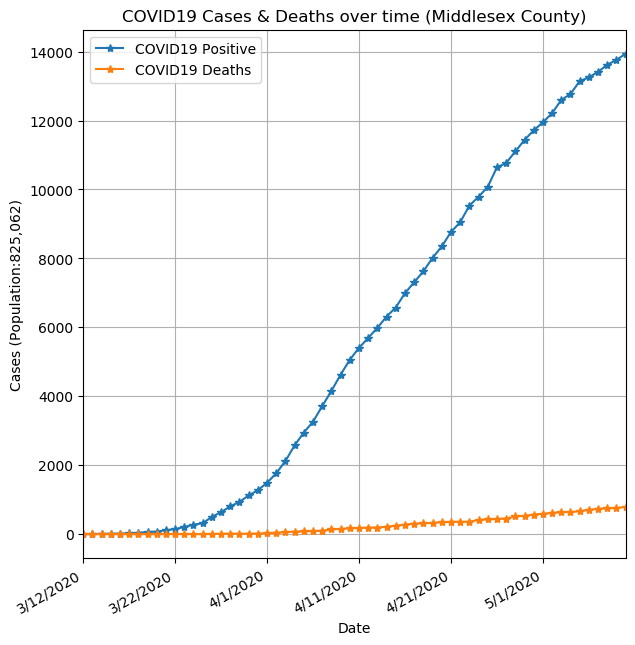

In [117]:
#Set fig size
fig,ax = plt.subplots(figsize=(7,7), dpi=100)

middlesex_data.plot(kind="line",ax=ax,marker = "*")
plt.xlabel("Date")
plt.ylabel("Cases (Population:825,062)")
plt.title("COVID19 Cases & Deaths over time (Middlesex County)")
plt.grid(which='major')
#Set x axis lable alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#Save plot file
plt.savefig(graph_path +"middlesexCounty.png")

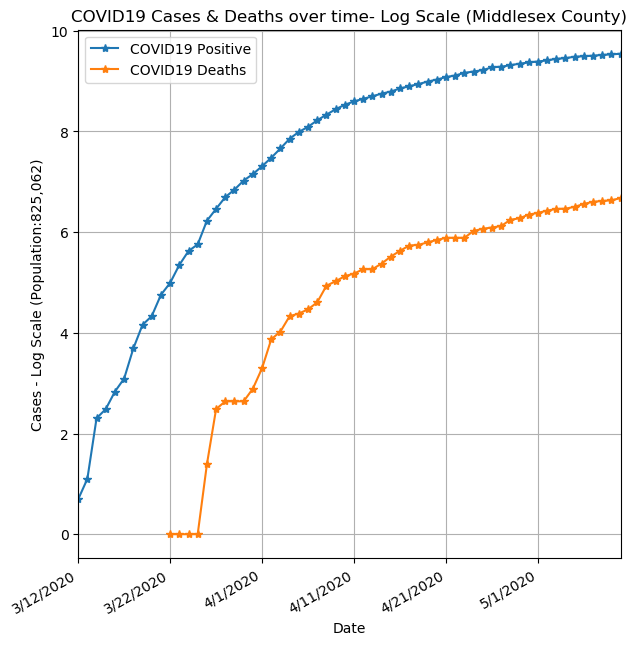

In [118]:
#Set fig size
fig,ax = plt.subplots(figsize=(7,7), dpi=100)

middlesex_data_log.plot(kind="line",ax=ax,marker = "*")
plt.xlabel("Date")
plt.ylabel("Cases - Log Scale (Population:825,062)")
plt.title("COVID19 Cases & Deaths over time- Log Scale (Middlesex County)")
plt.grid(which='major')
#Set x axis lable alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#Save plot file
plt.savefig(graph_path +"middlesexCountylog.png")

## Salem County

In [119]:
#Get Data sets
salem_confirmed =df_confirm_cases[df_confirm_cases["County Name"].isin (["Salem County"])]
salem_deaths = df_confirm_deaths[df_confirm_deaths["County Name"].isin (["Salem County"])]
salem_population = df_population[df_population["County Name"].isin(["Salem County"])]

In [120]:
#Reset index
salem_confirmed =salem_confirmed.reset_index()
salem_deaths =salem_deaths.reset_index()

In [121]:
#Delete irrlevant columns
salem_confirmed = salem_confirmed.drop(["index","countyFIPS","State","stateFIPS"], axis = 1) 
salem_deaths = salem_deaths.drop(["index","countyFIPS","State","stateFIPS"], axis = 1) 

In [122]:
#Set indexes
salem_confirmed =salem_confirmed.set_index("County Name")
salem_deaths =salem_deaths.set_index("County Name")

In [123]:
#Transpose Data
salem_confirmed =salem_confirmed.T
salem_deaths =salem_deaths.T

In [124]:
#Rename colum
salem_confirmed=salem_confirmed.rename(columns={"Salem County":"salemPositive"})
salem_deaths=salem_deaths.rename(columns={"Salem County":"salemDeaths"})
salem_confirmed=salem_confirmed.reset_index()
salem_deaths=salem_deaths.reset_index()

In [125]:
#Display sample data
salem_confirmed.head(2)

County Name,index,salemPositive
0,1/22/2020,0
1,1/23/2020,0


In [126]:
#Mere Confirmed cases and deaths
salem_df = pd.merge(salem_deaths,salem_confirmed, on="index")

In [127]:
#Display sample data
salem_df.head(2)

County Name,index,salemDeaths,salemPositive
0,1/22/2020,0,0
1,1/23/2020,0,0


In [128]:
#Set index
salem_df=salem_df.set_index("index")

In [129]:
#Delete Columns with zero values -COVID reporting did not start
salem_df = salem_df.loc[(salem_df != 0).any(axis=1)]

In [130]:
#Display sample data
salem_df.head(2)

County Name,salemDeaths,salemPositive
index,,
3/22/2020,0,1
3/23/2020,0,1


In [131]:
#Reset Index
salem_df=salem_df.reset_index()

In [132]:
#Hudson Population factor 
salem_pop = salem_population["population"]
salem_pop

17    62385
Name: population, dtype: int64

### Salem County Plot - regular and logarithmic scale

In [133]:
#Create a Data Frames
salem_data=pd.DataFrame({"Date":(salem_df["index"]),
                        "COVID19 Positive":(salem_df["salemPositive"]),
                        "COVID19 Deaths":(salem_df["salemDeaths"])})
#Log scale
salem_data_log=pd.DataFrame({"Date":(salem_df["index"]),
                        "COVID19 Positive":np.log(salem_df["salemPositive"]),
                        "COVID19 Deaths":np.log(salem_df["salemDeaths"])})

C:\Users\anuaj\Anaconda3\envs\PythonData2020_1\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [134]:
#Display sample data
salem_data.tail(2)

,Date,COVID19 Positive,COVID19 Deaths
48,5/9/2020,400,18
49,5/10/2020,411,18


In [135]:
#Set Index as date for plot
salem_data_log=salem_data_log.set_index("Date")
salem_data=salem_data.set_index("Date")

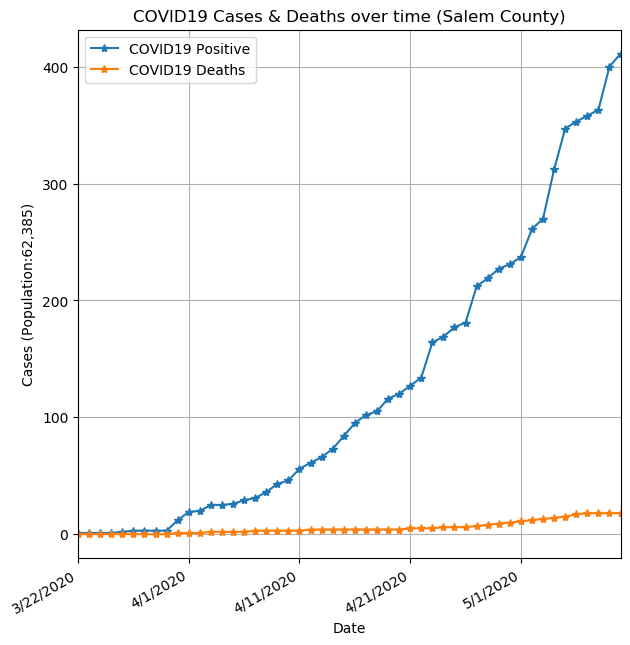

In [136]:
#Set fig size
fig,ax = plt.subplots(figsize=(7,7), dpi=100)

salem_data.plot(kind="line",ax=ax, marker = "*")
plt.xlabel("Date")
plt.ylabel("Cases (Population:62,385)")
plt.title("COVID19 Cases & Deaths over time (Salem County)")
plt.grid(which='major')
#Set x axis lable alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#Save plot file
plt.savefig(graph_path +"salemCounty.png")

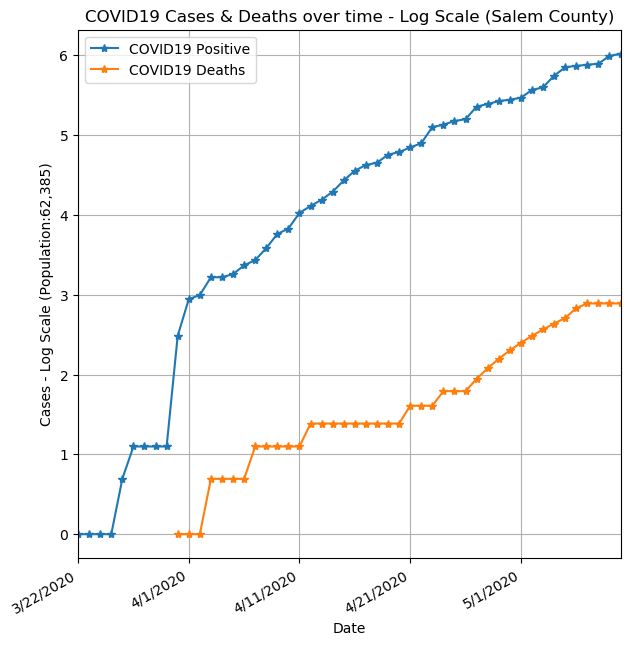

In [137]:
#Set fig size
fig,ax = plt.subplots(figsize=(7,7), dpi=100)

salem_data_log.plot(kind="line",ax=ax, marker = "*")
plt.xlabel("Date")
plt.ylabel("Cases - Log Scale (Population:62,385)")
plt.title("COVID19 Cases & Deaths over time - Log Scale (Salem County)")
plt.grid(which='major')
#Set x axis lable alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#Save plot file
plt.savefig(graph_path +"salemCountylog.png")

## Cape May County

In [138]:
#Get Data sets
capemay_confirmed =df_confirm_cases[df_confirm_cases["County Name"].isin (["Cape May County"])]
capemay_deaths = df_confirm_deaths[df_confirm_deaths["County Name"].isin (["Cape May County"])]
capemay_population = df_population[df_population["County Name"].isin(["Cape May County"])]

In [139]:
#Reset index
capemay_confirmed =capemay_confirmed.reset_index()
capemay_deaths =capemay_deaths.reset_index()

In [140]:
#Delete irrlevant columns
capemay_confirmed = capemay_confirmed.drop(["index","countyFIPS","State","stateFIPS"], axis = 1) 
capemay_deaths = capemay_deaths.drop(["index","countyFIPS","State","stateFIPS"], axis = 1) 

In [141]:
#Set indexes
capemay_confirmed =capemay_confirmed.set_index("County Name")
capemay_deaths =capemay_deaths.set_index("County Name")

In [142]:
#Transpose Data
capemay_confirmed =capemay_confirmed.T
capemay_deaths =capemay_deaths.T

In [143]:
#Rename colum
capemay_confirmed=capemay_confirmed.rename(columns={"Cape May County":"capemayPositive"})
capemay_deaths=capemay_deaths.rename(columns={"Cape May County":"capemayDeaths"})
capemay_confirmed=capemay_confirmed.reset_index()
capemay_deaths=capemay_deaths.reset_index()

In [144]:
#Mere Confirmed cases and deaths
capemay_df = pd.merge(capemay_deaths,capemay_confirmed, on="index")

In [145]:
#Set Index
capemay_df=capemay_df.set_index("index")

In [146]:
#Delete Columns with zero values -COVID reporting did not start
capemay_df = capemay_df.loc[(capemay_df != 0).any(axis=1)]

In [147]:
#Reset Index
capemay_df=capemay_df.reset_index()

In [148]:
#capemay Population count
capemay_pop = capemay_population["population"]
capemay_pop

5    92039
Name: population, dtype: int64

### Cape May County Plot - regular and logarithmic scale

In [149]:
#Create a Data Frames - Log
capemay_data_log=pd.DataFrame({"Date":(capemay_df["index"]),
                        "COVID19 Positive":np.log(capemay_df["capemayPositive"]),
                        "COVID19 Deaths":np.log(capemay_df["capemayDeaths"])})
#Create a Data Frame
capemay_data=pd.DataFrame({"Date":(capemay_df["index"]),
                        "COVID19 Positive":(capemay_df["capemayPositive"]),
                        "COVID19 Deaths":(capemay_df["capemayDeaths"])})

C:\Users\anuaj\Anaconda3\envs\PythonData2020_1\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [150]:
#Set Index for plot
capemay_data_log=capemay_data_log.set_index("Date")
capemay_data=capemay_data.set_index("Date")

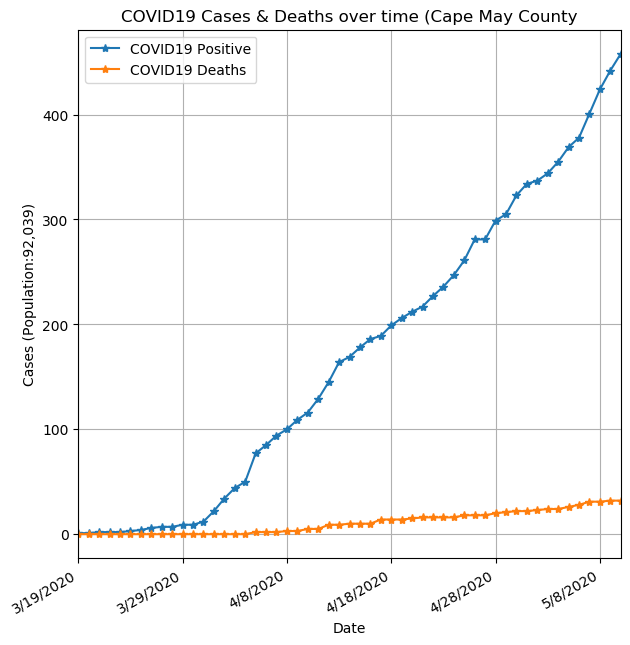

In [151]:
#Set fig size
fig,ax = plt.subplots(figsize=(7,7), dpi=100)

capemay_data.plot(kind="line",ax=ax,marker = "*")
plt.xlabel("Date")
plt.ylabel("Cases (Population:92,039)")
plt.title("COVID19 Cases & Deaths over time (Cape May County")
plt.grid(which='major')
#Set x axis lable alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#Save plot file
plt.savefig(graph_path +"capemayCounty.png")

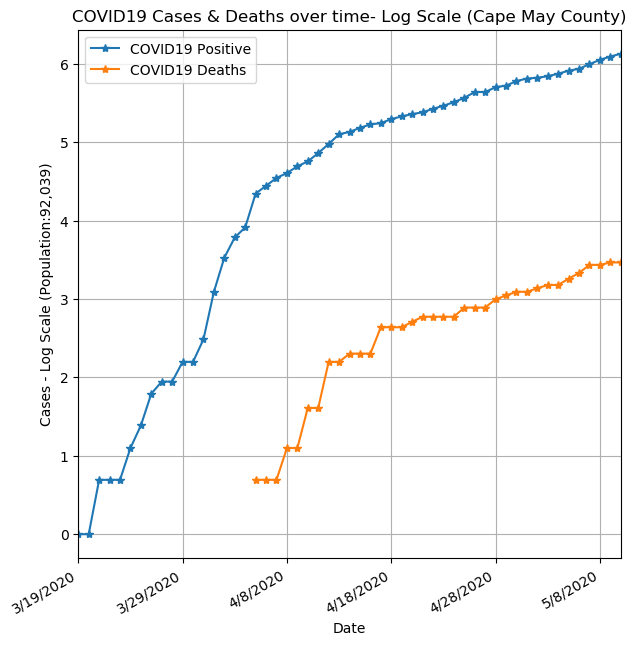

In [152]:
#Set fig size
fig,ax = plt.subplots(figsize=(7,7), dpi=100)

capemay_data_log.plot(kind="line",ax=ax,marker = "*")
plt.xlabel("Date")
plt.ylabel("Cases - Log Scale (Population:92,039)")
plt.title("COVID19 Cases & Deaths over time- Log Scale (Cape May County)")
plt.grid(which='major')
#Set x axis lable alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#Save plot file
plt.savefig(graph_path +"capemayCountylog.png")